# Visualizing a Demo

Awpy allows you to easily visualize Counter-Strike 2 data. We provide basic gif and heatmap creation functions. First, start by parsing a demo.

In [1]:
from awpy import Demo

# Demo: https://www.hltv.org/matches/2372746/spirit-vs-natus-vincere-blast-premier-spring-final-2024 (de_dust2, Map 2)
dem = Demo("spirit-vs-natus-vincere-m2-dust2.dem", verbose=False)

## Plotting a tick

You can plot a single frame with `from awpy.plot import plot`. A list of useful visual settings is found in `from awpy.plot import PLOT_SETTINGS`.

(<Figure size 1024x1024 with 1 Axes>, <Axes: >)

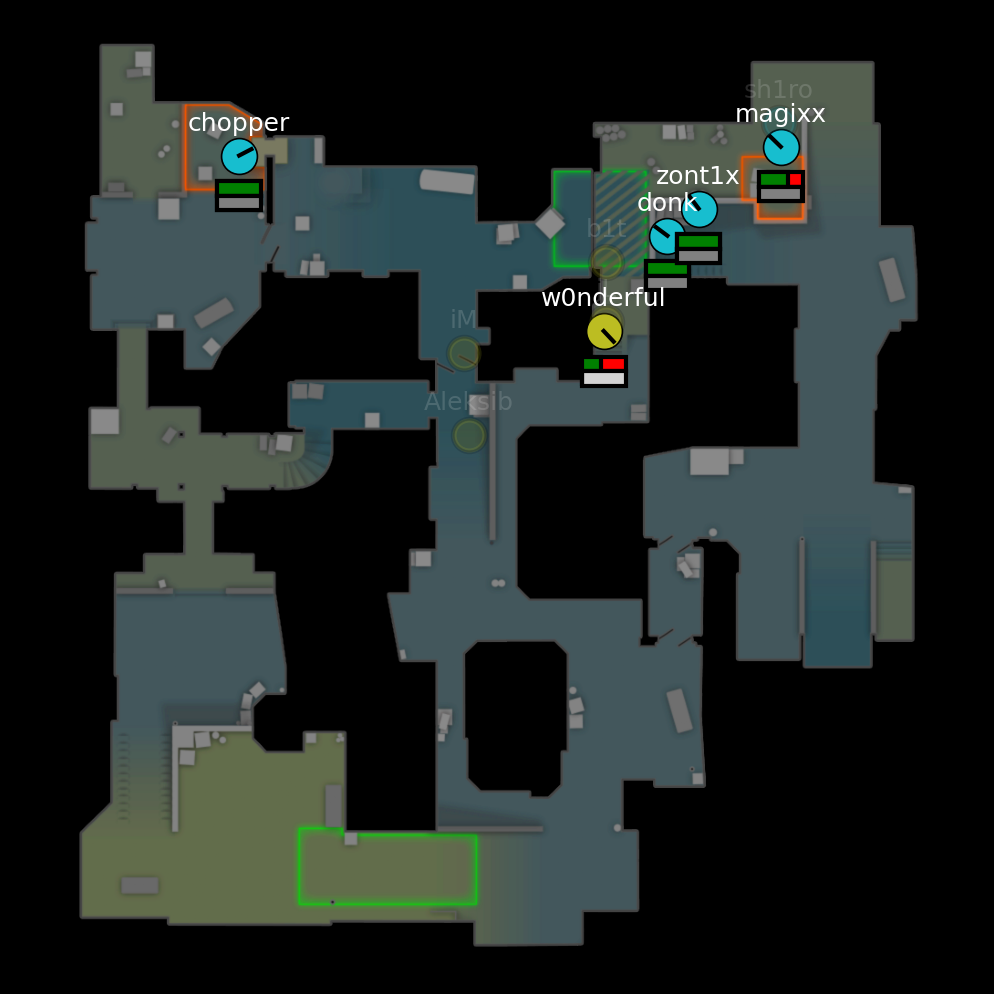

In [2]:
from awpy.plot import plot, PLOT_SETTINGS

frame_df = dem.ticks[dem.ticks["tick"] == dem.ticks.tick.unique()[19283]]
frame_df = frame_df[
    ["X", "Y", "Z", "health", "armor_value", "pitch", "yaw", "team_name", "name"]
]

points = []
point_settings = []

for _, row in frame_df.iterrows():
    points.append((row["X"], row["Y"], row["Z"]))

    # Determine team and corresponding settings
    team = "ct" if row["team_name"] == "CT" else "t"
    settings = PLOT_SETTINGS[team].copy()

    # Add additional settings
    settings.update(
        {
            "hp": row["health"],
            "armor": row["armor_value"],
            "direction": (row["pitch"], row["yaw"]),
            "label": row["name"],
        }
    )

    point_settings.append(settings)

plot("de_dust2", points, point_settings)

## Gif

Oftentimes, we want to plot a series of frames, which we can do with `from awpy.plot import gif`. Below, we plot the every 128th tick for round 1 as a gif. It can take a while to create, so please be patient!

In [3]:
from awpy.plot import gif, PLOT_SETTINGS
from tqdm import tqdm

frames = []

for tick in tqdm(dem.ticks[dem.ticks["round"] == 1].tick.values[::128]):
    frame_df = dem.ticks[dem.ticks["tick"] == tick]
    frame_df = frame_df[
        ["X", "Y", "Z", "health", "armor_value", "pitch", "yaw", "team_name", "name"]
    ]

    points = []
    point_settings = []

    for _, row in frame_df.iterrows():
        points.append((row["X"], row["Y"], row["Z"]))

        # Determine team and corresponding settings
        team = "ct" if row["team_name"] == "CT" else "t"
        settings = PLOT_SETTINGS[team].copy()

        # Add additional settings
        settings.update(
            {
                "hp": row["health"],
                "armor": row["armor_value"],
                "direction": (row["pitch"], row["yaw"]),
                "label": row["name"],
            }
        )

        point_settings.append(settings)

    frames.append({"points": points, "point_settings": point_settings})

print("Finished processing frames. Creating gif...")
gif("de_dust2", frames, "de_dust2.gif", duration=100)

100%|██████████| 472/472 [00:00<00:00, 878.17it/s]


Finished processing frames. Creating gif...


100%|██████████| 472/472 [01:49<00:00,  4.30it/s]


## Heatmap

Finally, you can also create heatmaps. Below, we create heatmaps for a random sample of 10,000 player locations in the demo. The available `method` options are `hex`, `hist` and `kde`. You will also want to play with the `size` parameter. The values shown below are good starting points for the corresponding `method`, but it will depend on what you are visualizing.

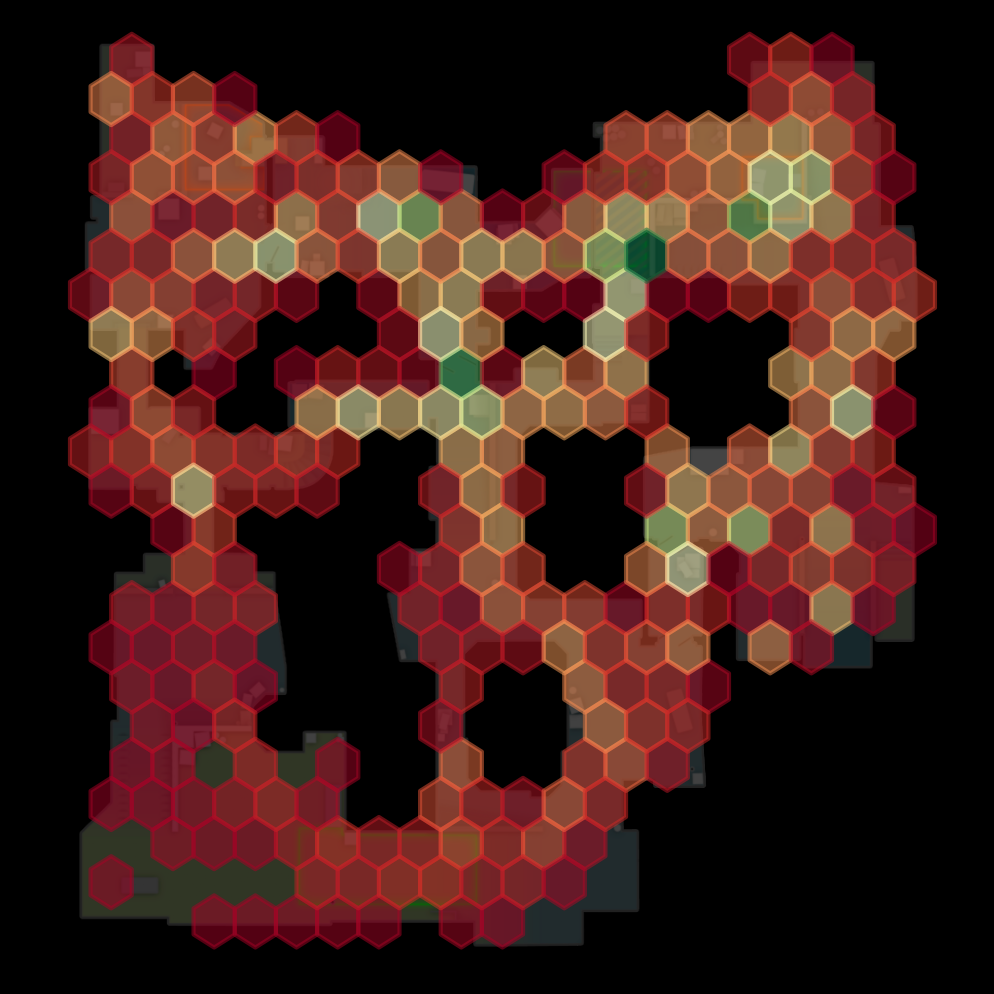

In [4]:
from awpy.plot import heatmap

player_locations = list(
    dem.ticks[["X", "Y", "Z"]].sample(10000).itertuples(index=False, name=None)
)
fig, ax = heatmap(map_name="de_dust2", points=player_locations, method="hex", size=20)

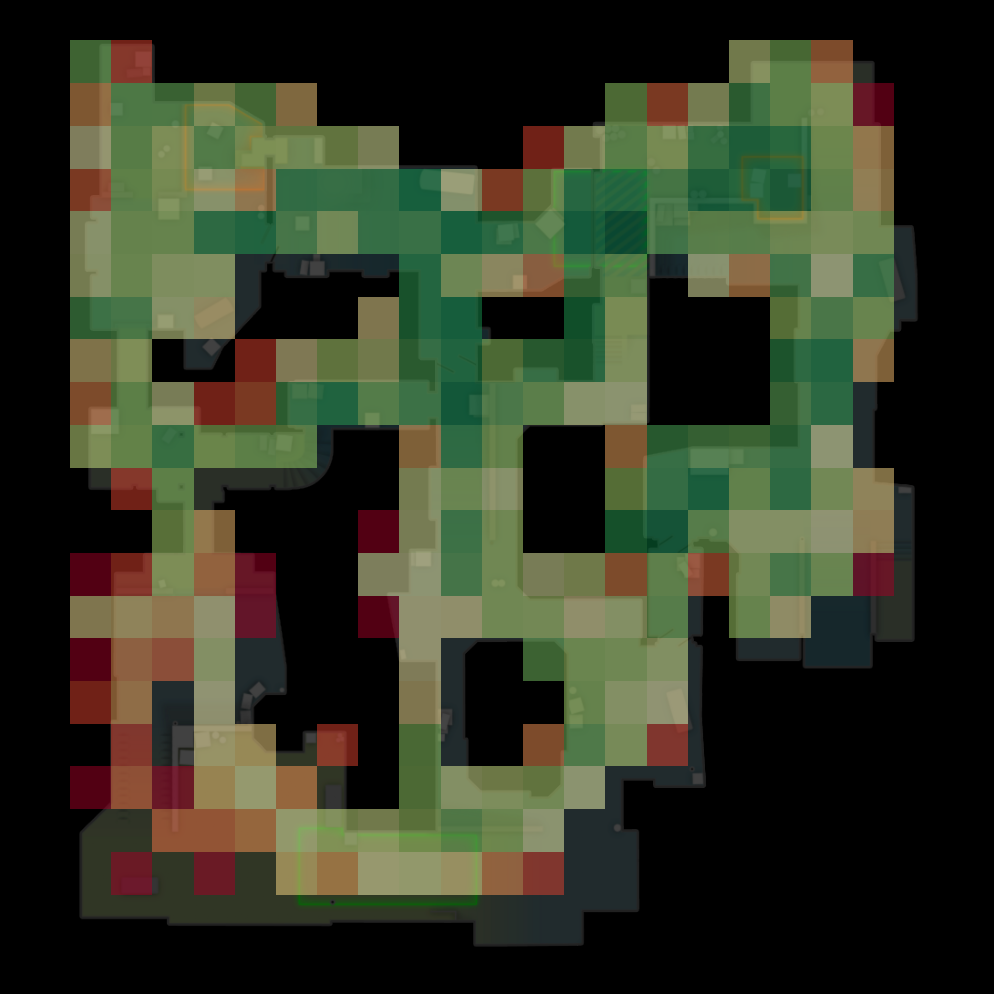

In [49]:
from awpy.plot import heatmap

player_locations = list(
    dem.ticks[["X", "Y", "Z"]].sample(10000).itertuples(index=False, name=None)
)
fig, ax = heatmap(map_name="de_dust2", points=player_locations, method="hist", size=20)

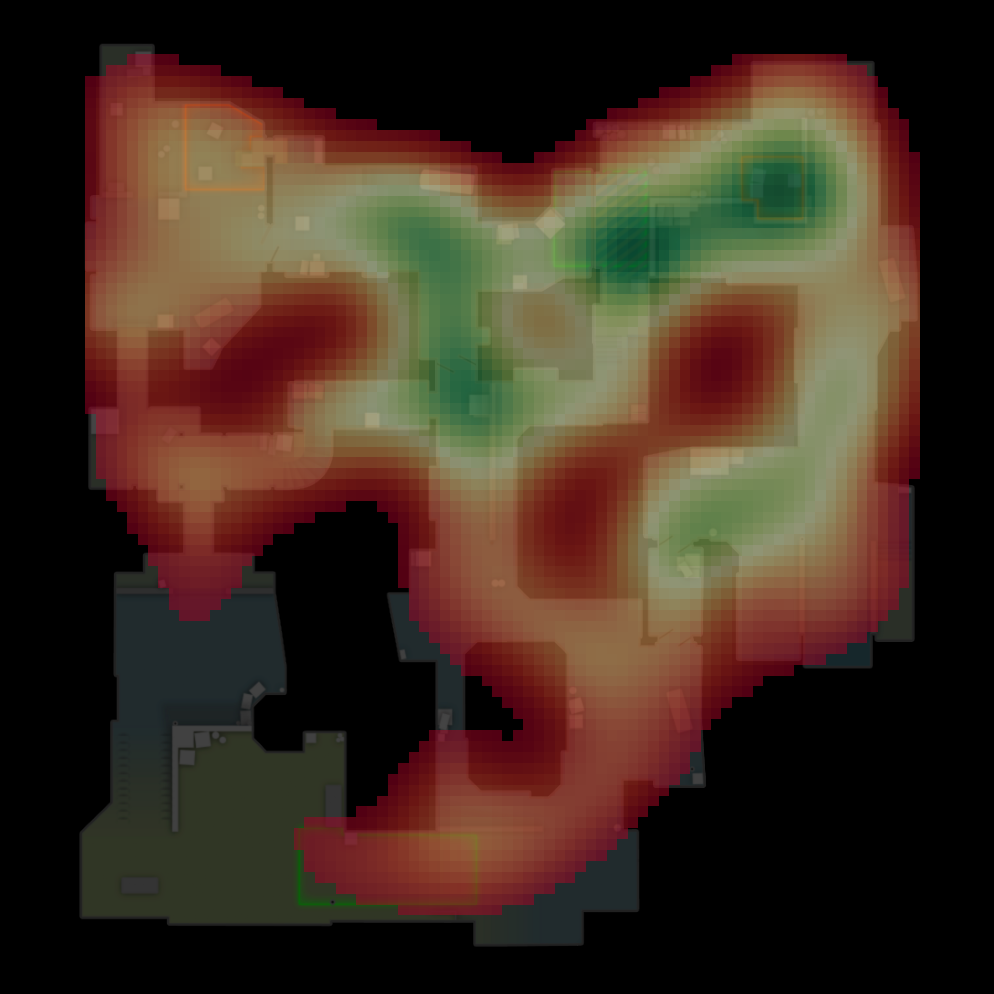

In [5]:
from awpy.plot import heatmap

player_locations = list(
    dem.ticks[["X", "Y", "Z"]].sample(10000).itertuples(index=False, name=None)
)
fig, ax = heatmap(
    map_name="de_dust2",
    points=player_locations,
    method="kde",
    size=80,
    vary_alpha=False,
)